<a href="https://colab.research.google.com/github/hsnaidu/BASICS/blob/main/GRU_MAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
GRU CODE
```



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load and preprocess data
data = {
    "Time_Taken_gettickcount": [
        166809562, 166809718, 166809890, 166810046, 166810187, 166810343,
        166810484, 166810640, 166810781, 166810921, 166811046, 166811203,
        166811359, 166811515, 166811671, 166811812, 166811937, 166812125,
        166812281, 166812437, 166812578, 166812750, 166812875, 166813015,
        166813140, 166813328, 166813484, 166813640, 166813781
    ],
    "Input_X": [
        481, 507, 505, 497, 517, 516, 510, 511, 512, 519, 530, 538, 552,
        565, 577, 580, 581, 581, 580, 581, 582, 596, 597, 597, 597, 597,
        597, 597, 596
    ],
    "Input_Y": [
        1072, 1068, 1065, 1075, 1069, 1065, 1063, 1063, 1059, 1057, 1054,
        1056, 1054, 1051, 1020, 1017, 1020, 1030, 1024, 1026, 1024, 1025,
        1029, 1029, 1027, 1022, 1022, 1029, 1035
    ]
}
df = pd.DataFrame(data)

# Normalization
features = df[["Input_X", "Input_Y"]].values # Taking only Input_X and Input_Y
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Sequences for GRU
sequence_length = 5
X, y = [], []
for i in range(len(scaled_features) - sequence_length):
    X.append(scaled_features[i:i + sequence_length])
    y.append(scaled_features[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Train Test Split
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build GRU model
model = Sequential([
    GRU(64, activation='tanh', input_shape=(sequence_length, 2), return_sequences=False),
    Dense(2)  # Predict both Input_X and Input_Y
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8, verbose=0)

# Predict next 5 data points
predictions = []
last_sequence = scaled_features[-sequence_length:]
for _ in range(5):
    next_point = model.predict(last_sequence[np.newaxis, :, :], verbose=0)
    predictions.append(next_point[0])
    last_sequence = np.vstack([last_sequence[1:], next_point])

# Rescale predictions to original scale
predictions_rescaled = scaler.inverse_transform(predictions)
predictions_rescaled


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          13,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,186 (51.51 KB)

 Trainable params: 13,186 (51.51 KB)

 Non-trainable params: 0 (0.00 B)

array([[ 600.74699306, 1027.04463008],
       [ 602.44482899, 1025.74467605],
       [ 604.21335506, 1024.68189427],
       [ 605.93834972, 1023.77325803],
       [ 607.56382227, 1022.90462354]])

## INITIAL CODE : PyTorch

Epoch [1/50], Train Loss: 0.2958, Val Loss: 1.1981
Epoch [2/50], Train Loss: 0.1933, Val Loss: 0.8991
Epoch [3/50], Train Loss: 0.1807, Val Loss: 0.7437
Epoch [4/50], Train Loss: 0.1736, Val Loss: 1.0328
Epoch [5/50], Train Loss: 0.1566, Val Loss: 0.8622
Epoch [6/50], Train Loss: 0.1574, Val Loss: 0.5546
Epoch [7/50], Train Loss: 0.1499, Val Loss: 0.5571
Epoch [8/50], Train Loss: 0.1477, Val Loss: 0.6037
Epoch [9/50], Train Loss: 0.1442, Val Loss: 0.6242
Epoch [10/50], Train Loss: 0.1457, Val Loss: 0.6124
Epoch [11/50], Train Loss: 0.1415, Val Loss: 0.4850
Epoch [12/50], Train Loss: 0.1376, Val Loss: 0.4567
Epoch [13/50], Train Loss: 0.1357, Val Loss: 0.5351
Epoch [14/50], Train Loss: 0.1362, Val Loss: 0.4795
Epoch [15/50], Train Loss: 0.1335, Val Loss: 0.5336
Epoch [16/50], Train Loss: 0.1321, Val Loss: 0.5232
Epoch [17/50], Train Loss: 0.1307, Val Loss: 0.4978
Early stopping at epoch 17


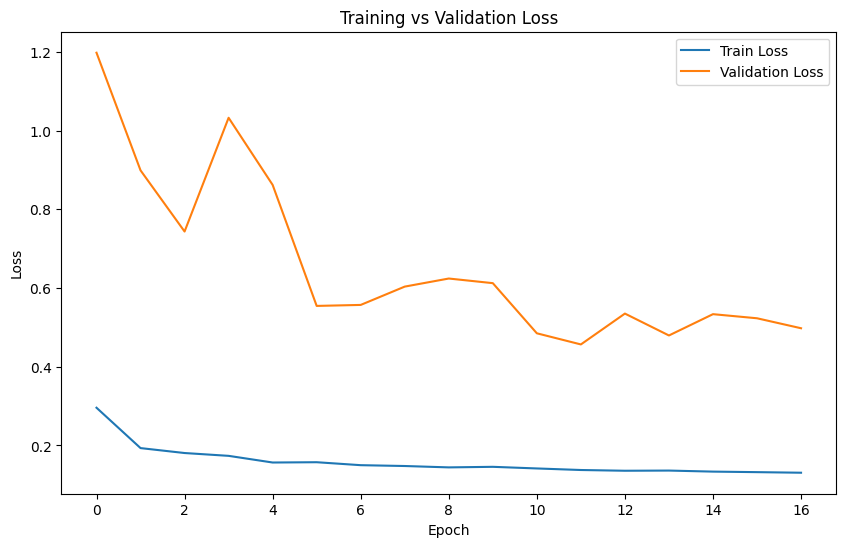

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# GRU model with Dropout (Used to avoid overfitting)
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.2):
        super(GRU, self).__init__()  # Updated model name
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)  # Changed to GRU
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Hidden layer initialization
        out, _ = self.gru(x, h0)  # Forward pass through GRU
        out = self.dropout(out[:, -1, :])  # Apply dropout on the last output
        out = self.fc(out)  # Output layer
        return out

# Data Preprocessing: Train-Test Split
def prepare_data(df, train_ratio=0.8, seq_length=3):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df[['Input_X', 'Input_Y']])
    df[['Input_X', 'Input_Y']] = normalized_data
    coordinates = df[['Input_X', 'Input_Y']].values

    # Prepare sequences
    sequences = []
    for i in range(len(coordinates) - seq_length):
        sequences.append(coordinates[i:i+seq_length])

    sequences = np.array(sequences)
    train_size = int(len(sequences) * train_ratio)

    train_sequences = torch.Tensor(sequences[:train_size])
    val_sequences = torch.Tensor(sequences[train_size:])

    return train_sequences, val_sequences, scaler

# Training the GRU model
def train_model(model, train_sequences, val_sequences, num_epochs=50, learning_rate=0.001, patience=5):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for seq in train_sequences:
            optimizer.zero_grad()
            seq = seq.unsqueeze(0).to(device)
            inputs = seq[:, :-1, :]
            targets = seq[:, -1, :]
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_sequences)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for seq in val_sequences:
                seq = seq.unsqueeze(0).to(device)
                inputs = seq[:, :-1, :]
                targets = seq[:, -1, :]
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_loss /= len(val_sequences)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), '66_5.pth')  # Save the best model
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    # Plot training and validation losses
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()


file_path = '/content/COMBINED.xlsx'
df = pd.read_excel(file_path)

# Prepare the data
train_sequences, val_sequences, scaler = prepare_data(df)

# Initialize and train the GRU model
model = GRU(input_size=2, hidden_size=66, num_layers=5, output_size=2)
train_model(model, train_sequences, val_sequences, num_epochs=50)

[274.42426  209.40161  173.77563  149.80719  130.78558  124.72583
 119.93616  124.22943  118.6958   124.091736 109.7475   101.733826
  97.28412   95.09625   93.223206]
[1075.5995  1063.1095  1053.6433  1046.1554  1041.5382  1041.8925
 1039.9531  1042.393   1035.2346  1037.4796  1034.0103  1022.47156
 1015.8766  1011.0187  1007.88965]


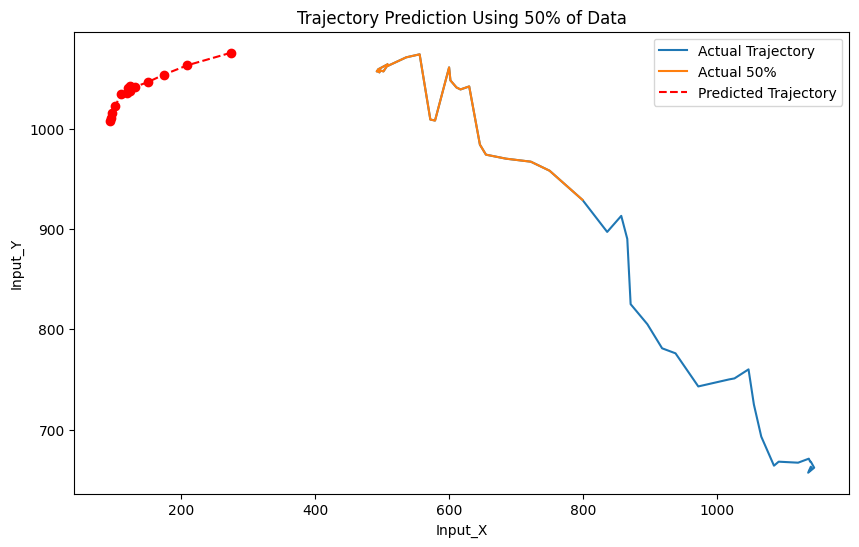

[1132.8434 1199.9763 1298.145  1350.1993 1359.5931 1354.7971 1348.6152
 1340.6919 1334.8257 1331.7919 1328.1461 1329.3481 1329.6555 1330.4099
 1331.727 ]
[783.1899  758.1126  705.23334 664.0039  642.6963  640.6784  646.0948
 662.28564 687.7669  734.11084 770.24524 772.72766 770.6968  767.2213
 764.61414]


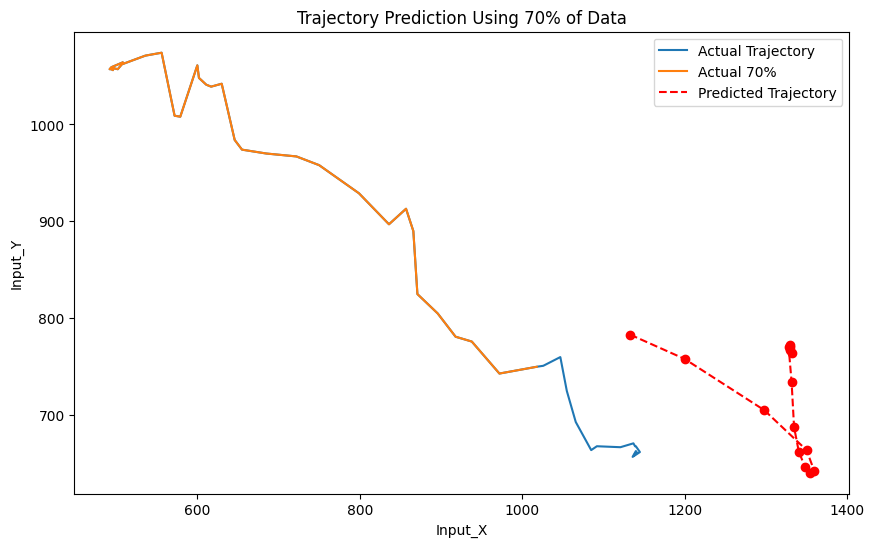

[1264.4677 1307.3805 1314.7455 1315.195  1315.1824 1314.7563 1316.0675
 1319.6412 1323.9514 1322.6697 1320.5831 1323.3018 1326.0845 1328.7527
 1331.16  ]
[627.2427  640.2679  640.7928  644.5756  652.6092  666.2716  679.9459
 691.36816 698.37506 719.1445  738.932   749.69293 753.54834 757.38495
 761.8603 ]


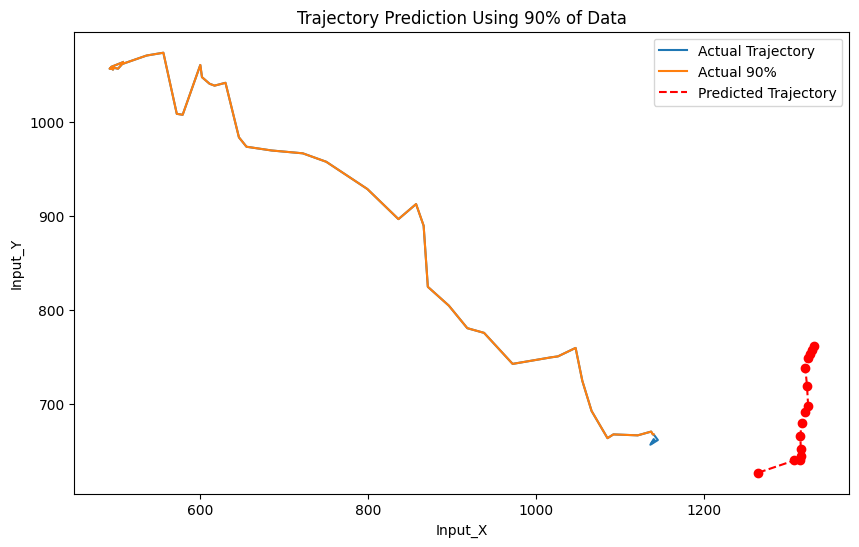

In [42]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.nn as nn

# GRU-Model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.9):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Hidden state initialization
        out, _ = self.gru(x, h0)  # Forward pass through GRU
        out = self.dropout(out[:, -1, :])  # Apply dropout on the last output
        out = self.fc(out)  # Output layer
        return out

# Prediction function
def predict_trajectory_pytorch(model_path, input_file, percentage, time_step=10):
    # Load the GRU model
    model = GRU(input_size=2,
                hidden_size=66,
                num_layers=5,
                output_size=2)

    model.load_state_dict(torch.load(model_path, weights_only=True))  # Ensure safe loading
    model.eval()

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    # Load and scale the data
    data = pd.read_excel(input_file)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[['Input_X', 'Input_Y']])

    # Define the split point
    split_point = int(len(data_scaled) * percentage / 100)

    # Prepare input data for prediction
    X_input = data_scaled[:split_point]  # Data up to the percentage
    X_input = X_input[-time_step:]  # Use only the last 'time_step' points for prediction
    X_input = torch.Tensor(X_input).unsqueeze(0).to(device)  # (1, time_step, input_size)

    predictions = []

    for _ in range(number_of_steps_future):
        with torch.no_grad():
            pred = model(X_input)  # Forward pass through the GRU
            predictions.append(pred.cpu().numpy()[0])

            # Reshape the prediction to match the input dimensions
            pred = pred.unsqueeze(0)  # Shape becomes (1, 1, 2)

            # Update the input by appending the prediction and removing the oldest point
            X_input = torch.cat((X_input[:, 1:, :], pred), dim=1)

    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)

    # Plot the actual vs predicted trajectory
    plt.figure(figsize=(10, 6))
    plt.plot(data['Input_X'], data['Input_Y'], label='Actual Trajectory')
    plt.plot(data['Input_X'].iloc[:split_point], data['Input_Y'].iloc[:split_point], label=f'Actual {percentage}%')
    plt.plot(predictions[:, 0], predictions[:, 1], label='Predicted Trajectory', linestyle='dashed', color='red')
    print(predictions[:,0])
    print(predictions[:,1])
    plt.scatter(predictions[:, 0], predictions[:, 1], c='red')
    plt.title(f'Trajectory Prediction Using {percentage}% of Data')
    plt.xlabel('Input_X')
    plt.ylabel('Input_Y')
    plt.legend()
    plt.show()

model_path = '/content/66_5.pth'
input_file = '/content/SuryaPrakash_Traj_7.xlsx'

number_of_steps_future = 15  # Future Steps to be plotted
percentage = 50  # Percentage of data to use for predictio

# Calling the function
predict_trajectory_pytorch(model_path, input_file, percentage)



number_of_steps_future = 15  # Future Steps to be plotted
percentage = 70  # Percentage of data to use for predictio

# Calling the function
predict_trajectory_pytorch(model_path, input_file, percentage)



number_of_steps_future = 15  # Future Steps to be plotted
percentage = 90  # Percentage of data to use for predictio

# Calling the function
predict_trajectory_pytorch(model_path, input_file, percentage)


# MAIN
## Adding the Time-Stamp


Processing file: /content/drive/MyDrive/Training_Data/Posi_1/Hari_Traj_1_New.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_1/himanshu_Traj_1.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_1/Jaya_Traj_1.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_1/dishank_Traj_1.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_1/Abhishek_Traj_1.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_1/Anujith_Traj_1.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_1/Ashok_Traj_1.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_1/Dinesh_Traj_1.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_2/anamika_Traj_5.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_2/Jaya_Traj_5.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_2/himanshu_Traj_5.xlsx
Processing file: /content/drive/MyDrive/Training_Data/Posi_2/gyanig_Traj_5.xlsx
Processing file: /content/drive/My

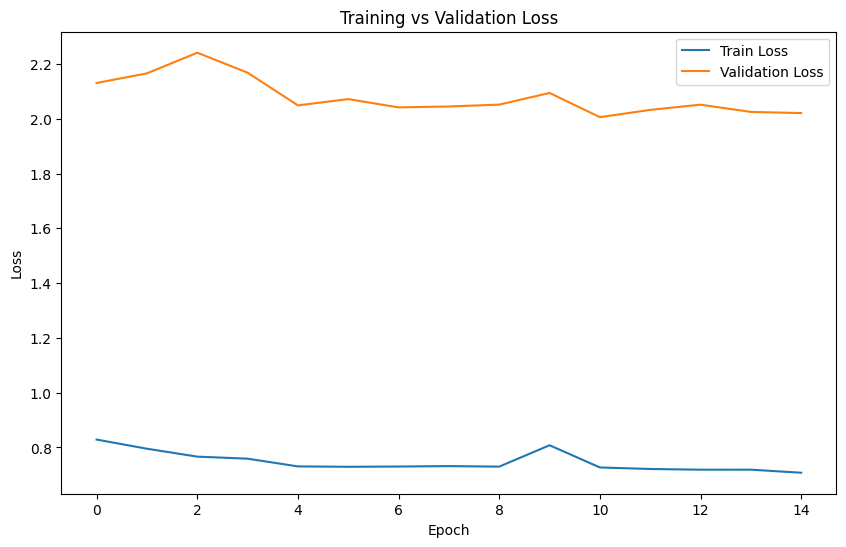

In [34]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# GRU model with Dropout and Bidirectional GRU (used to avoid overfitting)
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.4, bidirectional=False):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional

        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_size * (2 if bidirectional else 1), output_size)  # Adjust output layer for bidirectional
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * (2 if self.bidirectional else 1), x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.dropout(out[:, -1, :])
        out = self.fc(out)
        return out

# Data Preprocessing: Train-Test Split
def prepare_data_from_file(file_path, seq_length=5):
    df = pd.read_excel(file_path)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']])
    df[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']] = normalized_data
    coordinates = df[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']].values

    # Prepare sequences
    sequences = []
    for i in range(len(coordinates) - seq_length):
        sequences.append(coordinates[i:i+seq_length])

    sequences = np.array(sequences)
    return torch.Tensor(sequences), scaler

# Combine all sequences from multiple files
def load_data_from_folders(folder_path, seq_length=3):
    train_sequences_list = []
    val_sequences_list = []
    scalers = []

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                print(f"Processing file: {file_path}")
                sequences, scaler = prepare_data_from_file(file_path, seq_length=seq_length)
                scalers.append(scaler)

                # Split sequences into training and validation
                train_size = int(len(sequences) * 0.8)
                train_sequences_list.append(sequences[:train_size])
                val_sequences_list.append(sequences[train_size:])

    # Concatenate all training and validation sequences
    train_sequences = torch.cat(train_sequences_list, dim=0)
    val_sequences = torch.cat(val_sequences_list, dim=0)
    return train_sequences, val_sequences, scalers

# Improved Training Function with Learning Rate Scheduler and Gradient Clipping
def train_model(model, train_sequences, val_sequences, num_epochs=50, learning_rate=0.003, patience=5, clip_grad_norm=1.0):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for seq in train_sequences:
            optimizer.zero_grad()
            seq = seq.unsqueeze(0).to(device)
            inputs = seq[:, :-1, :]
            targets = seq[:, -1, :]
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_grad_norm)
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_sequences)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for seq in val_sequences:
                seq = seq.unsqueeze(0).to(device)
                inputs = seq[:, :-1, :]
                targets = seq[:, -1, :]
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

        val_loss /= len(val_sequences)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        scheduler.step(val_loss)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), 'Comb_67_9.pth')  # Save the best model
        else:
            epochs_no_improve += 1

        if epochs_no_improve == patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    # Plot training and validation losses
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()

# Path to the folder containing subfolders with Excel files
folder_path = '/content/drive/MyDrive/Training_Data'

# Load and preprocess data from all subfolders
train_sequences, val_sequences, scalers = load_data_from_folders(folder_path)

# Initialize and train the GRU model
model = GRU(input_size=3, hidden_size=67, num_layers=9, output_size=3, dropout_prob=0.3, bidirectional=True)
train_model(model, train_sequences, val_sequences, num_epochs=50, learning_rate=0.004, patience=4)



Predicting for 50% of data...
Predicted Input_X: [662.82916 664.6105  669.0002  680.4528  691.74133 699.78864 702.6663
 705.50073 710.9839  713.4374 ]
Predicted Input_Y: [674.93    666.50195 643.97296 579.1533  503.6499  455.5341  439.4731
 425.43018 406.9679  401.51764]


<ipython-input-50-2159e85b4583>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))  # Ensure s

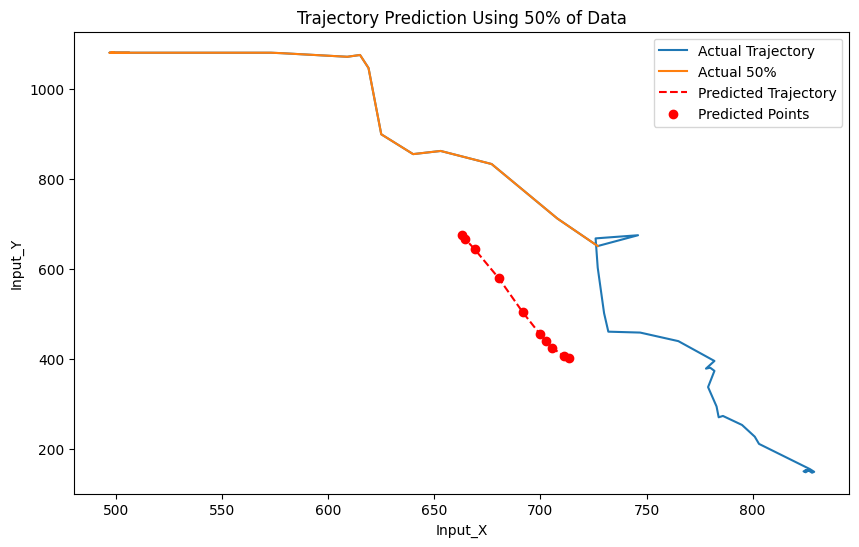


Predicting for 68% of data...
Predicted Input_X: [809.2158  809.8412  809.897   809.9104  809.92816 809.93304 809.9332
 809.9332  809.9332  809.9333 ]
Predicted Input_Y: [251.02328 247.09033 246.56702 246.44101 246.27094 246.22092 246.21912
 246.21887 246.21878 246.21869]


<ipython-input-50-2159e85b4583>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))  # Ensure s

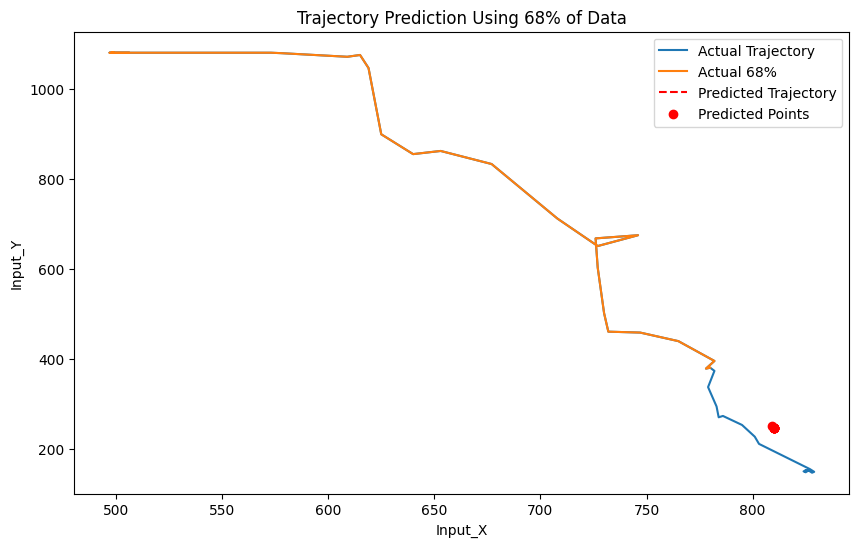


Predicting for 87% of data...
Predicted Input_X: [809.9453 809.9419 809.9381 809.9425 809.9373 809.9333 809.9333 809.9333
 809.9333 809.9333]
Predicted Input_Y: [246.1138  246.14005 246.16946 246.12744 246.17712 246.21857 246.21866
 246.21866 246.21866 246.21869]


<ipython-input-50-2159e85b4583>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))  # Ensure s

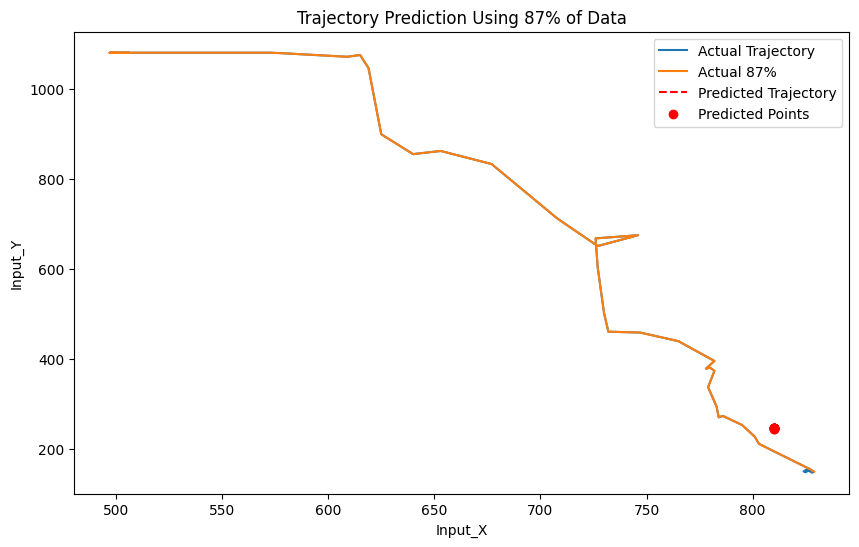

In [50]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.nn as nn

# GRU Model with Bidirectional and Dropout (Updated for Get_Tick_Count)
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.3):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Added bidirectional=True to GRU layer to make it bidirectional
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Output size must account for bidirectional (2 * hidden_size)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)  # Hidden state initialization (2 * for bidirectional)
        out, _ = self.gru(x, h0)  # Forward pass through GRU
        out = self.dropout(out[:, -1, :])  # Apply dropout on the last output
        out = self.fc(out)  # Output layer
        return out

# Prediction function
def predict_trajectory_pytorch(model_path, input_file, percentage, time_step=2, number_of_steps_future=5):
    # Load the GRU model
    model = GRU(input_size=3, hidden_size=68, num_layers=7, output_size=3)  # Updated input and output sizes

    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))  # Ensure safe loading
    model.eval()

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    # Load and scale the data
    data = pd.read_excel(input_file)
    scaler = StandardScaler()

    # Fit scaler on the entire dataset
    data_scaled = scaler.fit_transform(data[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']])

    # Define the split point
    split_point = int(len(data_scaled) * percentage / 100)

    # Prepare input data for prediction
    X_input = data_scaled[:split_point]  # Data up to the percentage
    X_input = X_input[-time_step:]  # Use only the last 'time_step' points for prediction
    X_input = torch.Tensor(X_input).unsqueeze(0).to(device)  # (1, time_step, input_size)

    predictions = []

    for _ in range(number_of_steps_future):
        with torch.no_grad():
            pred = model(X_input)  # Forward pass through the GRU
            predictions.append(pred.cpu().numpy()[0])

            # Reshape the prediction to match the input dimensions
            pred = pred.unsqueeze(0)  # Shape becomes (1, 1, 3)

            # Update the input by appending the prediction and removing the oldest point
            X_input = torch.cat((X_input[:, 1:, :], pred), dim=1)

    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)  # Inverse scale the predictions

    # Plot the actual vs predicted trajectory
    plt.figure(figsize=(10, 6))
    plt.plot(data['Input_X'], data['Input_Y'], label='Actual Trajectory')
    plt.plot(data['Input_X'].iloc[:split_point], data['Input_Y'].iloc[:split_point], label=f'Actual {percentage}%')
    plt.plot(predictions[:, 1], predictions[:, 2], label='Predicted Trajectory', linestyle='dashed', color='red')
    plt.scatter(predictions[:, 1], predictions[:, 2], c='red', label='Predicted Points')
    print("Predicted Input_X:", predictions[:, 1])
    print("Predicted Input_Y:", predictions[:, 2])
    plt.title(f'Trajectory Prediction Using {percentage}% of Data')
    plt.xlabel('Input_X')
    plt.ylabel('Input_Y')
    plt.legend()
    plt.show()

# Parameters
model_path = '/content/Comb_68_7.pth' # Updated model path
# input_file = '/content/yash_Traj_3.xlsx'
input_file = '/content/Rudra_Traj_4.xlsx'
# input_file = '/content/Rudra_Traj_3.xlsx'
time_step = 5
number_of_steps_future = 10

# Predictions for 50%, 70%, and 90% of the data
percentages = [50, 68, 87]
for percentage in percentages:
    print(f"\nPredicting for {percentage}% of data...")
    predict_trajectory_pytorch(model_path, input_file, percentage, time_step, number_of_steps_future)


https://chatgpt.com/c/674f21f5-85e4-8004-9ec7-9cdafafbac50

### gpt-finetuned

Epoch 1/50, Train Loss: 0.1999, Val Loss: 0.5717
Epoch 2/50, Train Loss: 0.1416, Val Loss: 0.0369
Epoch 3/50, Train Loss: 0.1108, Val Loss: 0.0566
Epoch 4/50, Train Loss: 0.1079, Val Loss: 0.0629
Epoch 5/50, Train Loss: 0.0639, Val Loss: 0.0610
Epoch 6/50, Train Loss: 0.0307, Val Loss: 0.0203
Epoch 7/50, Train Loss: 0.0245, Val Loss: 0.0200
Epoch 8/50, Train Loss: 0.0222, Val Loss: 0.0202
Epoch 9/50, Train Loss: 0.0182, Val Loss: 0.0248
Epoch 10/50, Train Loss: 0.0177, Val Loss: 0.0253
Epoch 11/50, Train Loss: 0.0143, Val Loss: 0.0142
Epoch 12/50, Train Loss: 0.0114, Val Loss: 0.0122
Epoch 13/50, Train Loss: 0.0105, Val Loss: 0.0122
Epoch 14/50, Train Loss: 0.0100, Val Loss: 0.0122
Epoch 15/50, Train Loss: 0.0098, Val Loss: 0.0120
Epoch 16/50, Train Loss: 0.0096, Val Loss: 0.0116
Epoch 17/50, Train Loss: 0.0093, Val Loss: 0.0113
Epoch 18/50, Train Loss: 0.0091, Val Loss: 0.0111
Epoch 19/50, Train Loss: 0.0090, Val Loss: 0.0109
Epoch 20/50, Train Loss: 0.0088, Val Loss: 0.0108
Epoch 21/

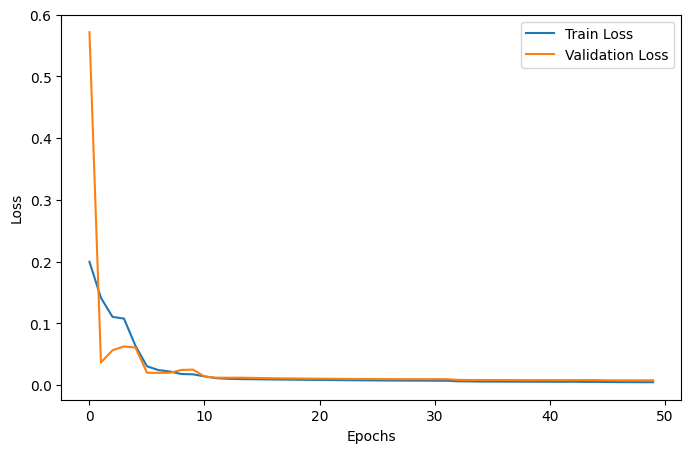

In [52]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, bidirectional=True):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bidirectional = bidirectional # Using the bidirectional GRU

        # GRU layer
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_size * (2 if bidirectional else 1), output_size)

    def forward(self, x):
        # GRU forward pass
        out, _ = self.gru(x)  # `out` shape: (batch_size, seq_length, hidden_size * num_directions)
        out = out[:, -1, :]  # Use the last time step: (batch_size, hidden_size * num_directions)
        out = self.fc(out)  # Final output: (batch_size, output_size)
        return out

# Preprocess data from a single file
def preprocess_file(file_path, seq_length=5):
    df = pd.read_excel(file_path)
    scaler = StandardScaler()
    data = scaler.fit_transform(df[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']])
    sequences = [data[i:i+seq_length] for i in range(len(data) - seq_length)]
    return torch.tensor(sequences, dtype=torch.float32), scaler

# Load and split data from all files in the folder
def load_data(folder_path, seq_length=5, split_ratio=0.8):
    sequences = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                seq, _ = preprocess_file(file_path, seq_length)
                sequences.append(seq)

    sequences = torch.cat(sequences, dim=0)
    train_size = int(len(sequences) * split_ratio)
    return sequences[:train_size], sequences[train_size:]

# Train the model
def train_model(model, train_data, val_data, num_epochs=50, learning_rate=0.003, patience=5):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for seq in train_data:
            optimizer.zero_grad()
            seq = seq.unsqueeze(0).to(device)
            inputs, targets = seq[:, :-1, :], seq[:, -1, :]
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_data)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for seq in val_data:
                seq = seq.unsqueeze(0).to(device)
                inputs, targets = seq[:, :-1, :], seq[:, -1, :]
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()

        val_loss /= len(val_data)
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stop_counter += 1
            if early_stop_counter == patience:
                print("Early stopping triggered!")
                break

    # Plot the loss curves
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Define dataset path and model parameters
folder_path = '/content/drive/MyDrive/Training_Data'
seq_length = 5
train_data, val_data = load_data(folder_path, seq_length)

# Model initialization
input_size, hidden_size, num_layers, output_size = 3, 50, 2, 3
model = GRU(input_size, hidden_size, num_layers, output_size)

# Train the model
train_model(model, train_data, val_data, num_epochs=50, learning_rate=0.003, patience=5)



Predicting for 55% of data...


<ipython-input-59-8154dce6295b>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


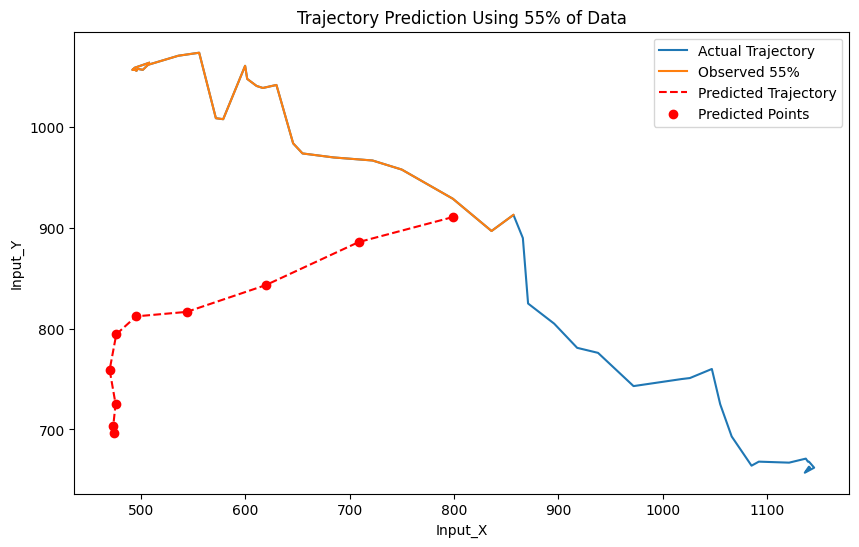

Predicted Input_X: [799.04456 708.85535 619.71716 544.1288  495.57608 476.62018 470.24365
 475.93445 473.6786  474.39542]
Predicted Input_Y: [910.8385  886.032   843.24084 816.70105 812.23096 794.4404  759.12305
 725.21387 703.2155  696.52936]

Predicting for 72% of data...


<ipython-input-59-8154dce6295b>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


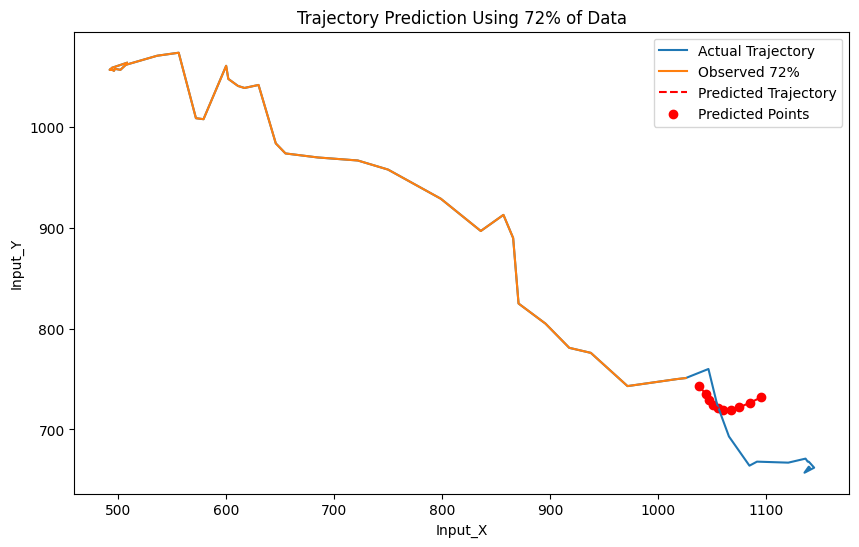

Predicted Input_X: [1038.3887 1044.491  1047.6549 1050.987  1055.5284 1060.6417 1067.5922
 1075.7804 1085.3755 1095.9805]
Predicted Input_Y: [742.80383 735.31793 729.5325  724.725   721.36646 719.6078  719.66614
 722.02167 726.4073  731.95624]

Predicting for 82% of data...


<ipython-input-59-8154dce6295b>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


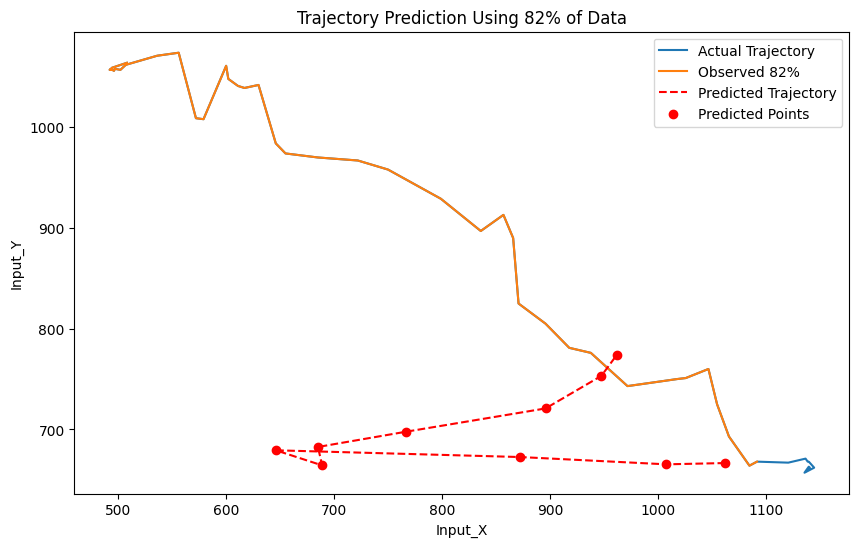

Predicted Input_X: [1062.5586  1007.9504   872.65625  646.0549   688.97076  685.0748
  766.5967   896.0409   947.74603  962.1787 ]
Predicted Input_Y: [666.60864 665.3324  672.56604 679.2646  664.2831  682.5683  697.6968
 720.8286  753.14154 774.12885]


In [59]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.nn as nn

# GRU Model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.3):
        super(GRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Adjusted for bidirectional GRU
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.dropout(out[:, -1, :])  # Use last output only
        out = self.fc(out)
        return out

# Prediction Function
def predict_trajectory(model_path, input_file, percentage, time_step=5, future_steps=10):
    # Load model
    model = GRU(input_size=3, hidden_size=50, num_layers=2, output_size=3, dropout_prob=0.3)
    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
    model.eval()

    # Device setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Load and preprocess data
    data = pd.read_excel(input_file)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']])
    split_point = int(len(data_scaled) * percentage / 100)
    X_input = data_scaled[:split_point][-time_step:]  # Last 'time_step' points
    X_input = torch.tensor(X_input, dtype=torch.float32).unsqueeze(0).to(device)  # Shape: (1, time_step, 3)

    predictions = []

    # Predict future trajectory
    for _ in range(future_steps):
        with torch.no_grad():
            pred = model(X_input)  # Forward pass
            predictions.append(pred.cpu().numpy())
            pred = pred.unsqueeze(0)  # Shape: (1, 1, 3)
            X_input = torch.cat((X_input[:, 1:, :], pred), dim=1)  # Update input with new prediction

    predictions = np.array(predictions).squeeze()
    predictions = scaler.inverse_transform(predictions)  # Inverse transform to original scale

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(data['Input_X'], data['Input_Y'], label='Actual Trajectory')
    plt.plot(data['Input_X'][:split_point], data['Input_Y'][:split_point], label=f'Observed {percentage}%')
    plt.plot(predictions[:, 1], predictions[:, 2], label='Predicted Trajectory', linestyle='--', color='red')
    plt.scatter(predictions[:, 1], predictions[:, 2], c='red', label='Predicted Points')
    plt.title(f'Trajectory Prediction Using {percentage}% of Data')
    plt.xlabel('Input_X')
    plt.ylabel('Input_Y')
    plt.legend()
    plt.show()

    # Print predictions
    print("Predicted Input_X:", predictions[:, 1])
    print("Predicted Input_Y:", predictions[:, 2])

# Parameters
model_path = '/content/best_model_50_2.pth'
input_file = '/content/SuryaPrakash_Traj_7.xlsx'
time_step = 7
future_steps = 10

# Predict for specified percentages
percentages = [55, 72, 82]
for percentage in percentages:
    print(f"\nPredicting for {percentage}% of data...")
    predict_trajectory(model_path, input_file, percentage, time_step, future_steps)


### GPT_FINETUNED_COPY

Epoch 1/100, Train Loss: 0.1993, Val Loss: 0.7897
Epoch 2/100, Train Loss: 0.1317, Val Loss: 0.1633
Epoch 3/100, Train Loss: 0.1495, Val Loss: 0.0339
Epoch 4/100, Train Loss: 0.0969, Val Loss: 0.0748
Epoch 5/100, Train Loss: 0.1249, Val Loss: 0.0927
Epoch 6/100, Train Loss: 0.0896, Val Loss: 0.0592
Epoch 7/100, Train Loss: 0.0579, Val Loss: 0.0508
Epoch 8/100, Train Loss: 0.0330, Val Loss: 0.0580
Epoch 9/100, Train Loss: 0.0270, Val Loss: 0.0373
Epoch 10/100, Train Loss: 0.0230, Val Loss: 0.0210
Epoch 11/100, Train Loss: 0.0214, Val Loss: 0.0257
Epoch 12/100, Train Loss: 0.0208, Val Loss: 0.0275
Epoch 13/100, Train Loss: 0.0196, Val Loss: 0.0363
Epoch 14/100, Train Loss: 0.0179, Val Loss: 0.0290
Epoch 15/100, Train Loss: 0.0134, Val Loss: 0.0124
Epoch 16/100, Train Loss: 0.0114, Val Loss: 0.0122
Epoch 17/100, Train Loss: 0.0103, Val Loss: 0.0132
Epoch 18/100, Train Loss: 0.0098, Val Loss: 0.0124
Epoch 19/100, Train Loss: 0.0098, Val Loss: 0.0131
Epoch 20/100, Train Loss: 0.0094, Val Lo

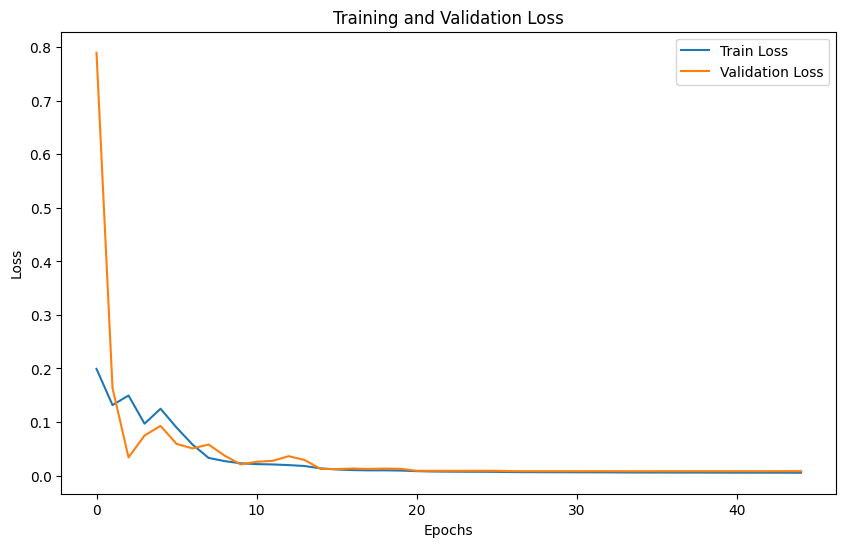

In [65]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, bidirectional=True):
        super(GRU, self).__init__()
        self.gru = nn.GRU(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional
        )
        self.fc = nn.Linear(hidden_size * (2 if bidirectional else 1), output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # Last time step
        out = self.fc(out)
        return out

def preprocess_file(file_path, seq_length=5):
    df = pd.read_excel(file_path)
    scaler = StandardScaler()
    data = scaler.fit_transform(df[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']])
    sequences = [data[i:i+seq_length] for i in range(len(data) - seq_length)]
    return torch.tensor(sequences, dtype=torch.float32), scaler

def load_data(folder_path, seq_length=5, split_ratio=0.8):
    sequences = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.xlsx'):
                file_path = os.path.join(root, file)
                seq, _ = preprocess_file(file_path, seq_length)
                sequences.append(seq)

    sequences = torch.cat(sequences, dim=0)
    train_size = int(len(sequences) * split_ratio)
    train_data = sequences[:train_size]
    val_data = sequences[train_size:]
    return train_data, val_data

def train_model(model, train_data, val_data, num_epochs=100, learning_rate=0.003, patience=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

    train_losses, val_losses = [], []
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for seq in train_data:
            seq = seq.unsqueeze(0).to(device)
            inputs, targets = seq[:, :-1, :], seq[:, -1, :]
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_data)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for seq in val_data:
                seq = seq.unsqueeze(0).to(device)
                inputs, targets = seq[:, :-1, :], seq[:, -1, :]
                outputs = model(inputs)
                val_loss += criterion(outputs, targets).item()

        val_loss /= len(val_data)
        val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), "best_model.pth")
        else:
            early_stop_counter += 1
            if early_stop_counter == patience:
                print("Early stopping triggered!")
                break

    # Plot losses
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

folder_path = '/content/drive/MyDrive/Training_Data'
seq_length = 5
train_data, val_data = load_data(folder_path, seq_length)

# Hyperparameters
input_size, hidden_size, num_layers, output_size = 3, 100, 3, 3  # Increased hidden size and layers
model = GRU(input_size, hidden_size, num_layers, output_size)

train_model(model, train_data, val_data, num_epochs=100, learning_rate=0.001, patience=10)



Predicting for 55% of data...


<ipython-input-93-81414fa2f16a>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


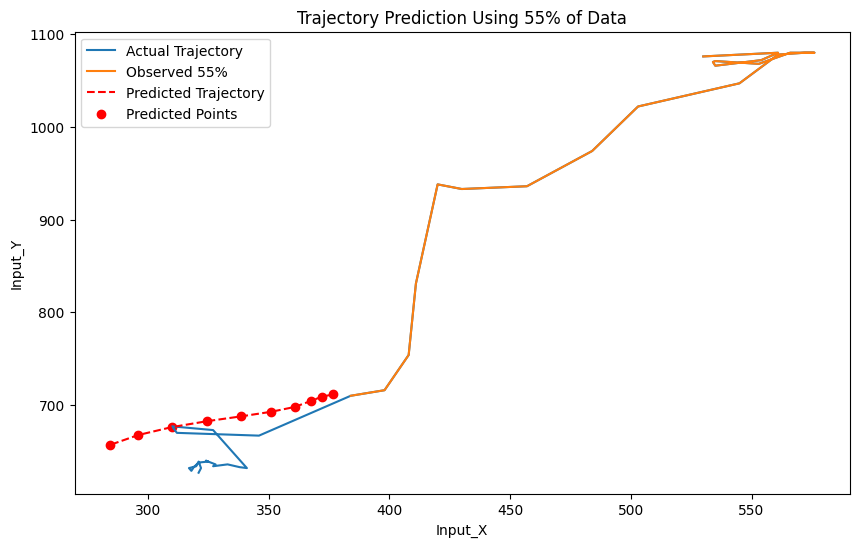

Predicted Input_X: [376.8357  371.9614  367.4748  360.82022 351.08536 338.7387  324.61343
 309.94623 296.0638  284.198  ]
Predicted Input_Y: [711.5702  708.9038  704.37756 697.9535  692.73175 687.8406  682.62445
 676.21826 667.69916 656.9011 ]

Predicting for 70% of data...


<ipython-input-93-81414fa2f16a>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


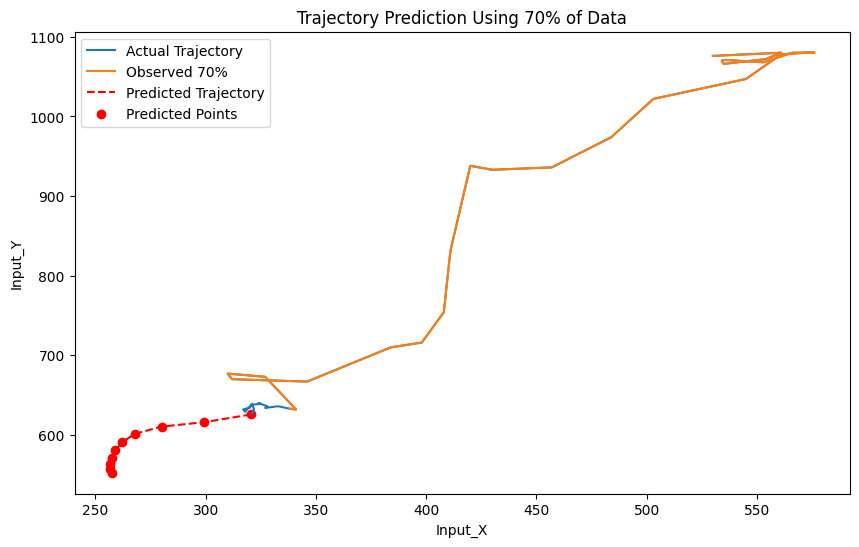

Predicted Input_X: [320.6086  299.2461  280.0477  267.9878  262.0532  259.07462 257.36536
 256.53882 256.61798 257.45566]
Predicted Input_Y: [625.68823 615.9582  610.4329  601.3875  590.7193  580.60065 571.30835
 563.70386 557.58716 552.53424]

Predicting for 82% of data...


<ipython-input-93-81414fa2f16a>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


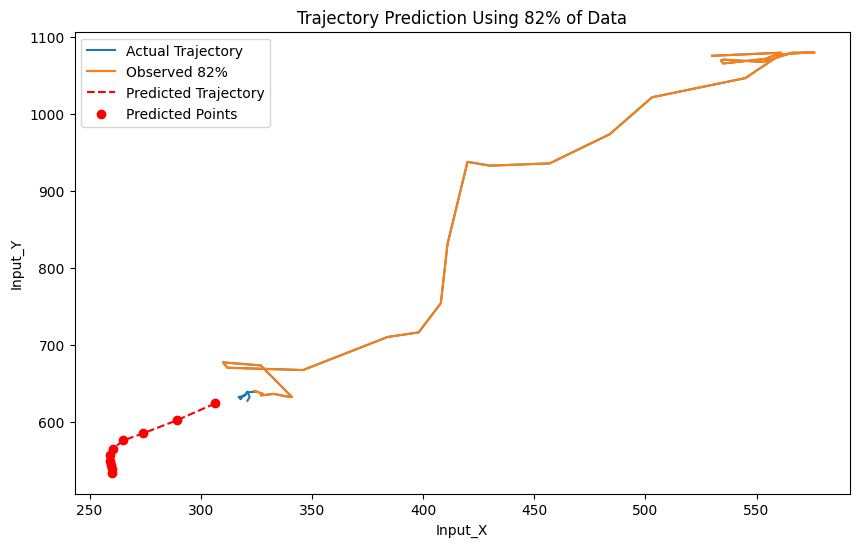

Predicted Input_X: [306.45218 289.36108 273.88568 265.18127 260.43246 259.06006 259.11426
 259.68134 260.05478 259.9883 ]
Predicted Input_Y: [623.524   601.7861  584.4495  575.44806 564.67535 556.1675  549.2311
 543.51105 538.25336 533.38806]


In [93]:
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.nn as nn

# GRU Model
class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.3):
        super(GRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)  # Adjusted for bidirectional GRU
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.dropout(out[:, -1, :])  # Use last output only
        out = self.fc(out)
        return out

# Prediction Function
def predict_trajectory(model_path, input_file, percentage, time_step=5, future_steps=10):
    # Load model
    model = GRU(input_size=3, hidden_size=100, num_layers=3, output_size=3, dropout_prob=0.3)
    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
    model.eval()

    # Device setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Load and preprocess data
    data = pd.read_excel(input_file)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[['Time_Taken_gettickcount', 'Input_X', 'Input_Y']])
    split_point = int(len(data_scaled) * percentage / 100)
    X_input = data_scaled[:split_point][-time_step:]  # Last 'time_step' points
    X_input = torch.tensor(X_input, dtype=torch.float32).unsqueeze(0).to(device)  # Shape: (1, time_step, 3)

    predictions = []

    # Predict future trajectory
    for _ in range(future_steps):
        with torch.no_grad():
            pred = model(X_input)  # Forward pass
            predictions.append(pred.cpu().numpy())
            pred = pred.unsqueeze(0)  # Shape: (1, 1, 3)
            X_input = torch.cat((X_input[:, 1:, :], pred), dim=1)  # Update input with new prediction

    predictions = np.array(predictions).squeeze()
    predictions = scaler.inverse_transform(predictions)  # Inverse transform to original scale

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(data['Input_X'], data['Input_Y'], label='Actual Trajectory')
    plt.plot(data['Input_X'][:split_point], data['Input_Y'][:split_point], label=f'Observed {percentage}%')
    plt.plot(predictions[:, 1], predictions[:, 2], label='Predicted Trajectory', linestyle='--', color='red')
    plt.scatter(predictions[:, 1], predictions[:, 2], c='red', label='Predicted Points')
    plt.title(f'Trajectory Prediction Using {percentage}% of Data')
    plt.xlabel('Input_X')
    plt.ylabel('Input_Y')
    plt.legend()
    plt.show()

    # Print predictions
    print("Predicted Input_X:", predictions[:, 1])
    print("Predicted Input_Y:", predictions[:, 2])

# Parameters
model_path = '/content/best_model_100_3.pth'


# Take the Prediction-Resuts of all these into a folder

# input_file = '/content/SuryaPrakash_Traj_7.xlsx' # ok'ish

# input_file = '/content/swapnil_Traj_1.xlsx' # ok'ish

input_file = '/content/Subin_Traj_1.xlsx' # ok'ish

# input_file = '/content/Subin_Traj_3.xlsx' # ok'ish

# input_file = '/content/Subin_Traj_5.xlsx' # ok'ish

# input_file = '/content/Rudra_Traj_4.xlsx'

time_step = 5
future_steps = 10

# Predict for specified percentages
percentages = [55, 70, 82]
for percentage in percentages:
    print(f"\nPredicting for {percentage}% of data...")
    predict_trajectory(model_path, input_file, percentage, time_step, future_steps)


https://chatgpt.com/c/674f1e3a-0748-8009-8884-e6cda85ae165

# Fine_Tuning the code more for Improvement

# For Comparision